Being an active chess player, and having a quite few chess player friends, the top chess players and the statistics in high-level chess is quite a frequent topic in our conversations. That's why I decided to have a look at some trends between July 2000 (the first world ranking list, that I could find on the website of the International Chess Federation (FIDE)) and June 2023. The statistics and trends that I have chosen to have a look at are quite random, and in the future when I have a bit more time, will probably continue to analyse this topic.

It should also be noted, that earlier FIDE published a new world ranking list every three months (even earlier, before the period I examine, only twice a year), in 2009, FIDE switched to publishing every two months and in 2012 to having a monthly world ranking list. That partly explains why are there bigger differences in some aspects in the consecutive ratings lists in 2000s and after 2012.

In [80]:
# importing the necessary libraries

import bs4 as bs
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import altair as alt
from pandas.io.formats.style import Styler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re

In [87]:
# scraping the data

all_rating = []
all_date = []
all_name = []
all_country = []

for i in range (1, 743, 4):
    html_text = requests.get('https://ratings.fide.com/toparc.phtml?cod='+str(i)).text
    soup = BeautifulSoup(html_text, 'html.parser')
    rating = soup.find_all('td')
    rating = rating[18::7]
    rating = [rating.text for rating in rating]
    rating = [rating.replace('\xa0',' ') for rating in rating]
    rating = [int(rating) for rating in rating]
    all_rating.append(rating)

    country = soup.find_all('td')
    country = country[17::7]
    country = [country.text for country in country]
    country = [country.replace('\xa0','') for country in country]
    all_country.append(country)

    name = soup.find_all('td')
    name = name[15::7]
    name = [name.text for name in name]
    name = [name.replace('\xa0','') for name in name]
    all_name.append(name)

    date = soup.find_all('td')
    date = date[3]
    date = [date.text for date in date]
    date = [date.replace('\n',' ') for date in date]
    date = [date.replace('\t',' ') for date in date]

    for date in date:
        matches = re.search(r'\b([A-Za-z]+ \d{4})\b', date)
        if matches:
            date = matches.group(1)
            a = date.split()
            #a.reverse()
            date = " ".join(a)
            all_date.append(date)



In [88]:
# checking if all the lists have the same length

print(len(all_rating))
print(len(all_date))
print(len(all_country))
print(len(all_name))

all_date

186
186
186
186


['July 2000',
 'October 2000',
 'January 2001',
 'April 2001',
 'July 2001',
 'October 2001',
 'January 2002',
 'April 2002',
 'July 2002',
 'October 2002',
 'January 2003',
 'April 2003',
 'July 2003',
 'October 2003',
 'January 2004',
 'April 2004',
 'July 2004',
 'October 2004',
 'January 2005',
 'April 2005',
 'July 2005',
 'October 2005',
 'January 2006',
 'April 2006',
 'July 2006',
 'October 2006',
 'January 2007',
 'April 2007',
 'July 2007',
 'October 2007',
 'January 2008',
 'April 2008',
 'July 2008',
 'October 2008',
 'January 2009',
 'April 2009',
 'July 2009',
 'September 2009',
 'November 2009',
 'January 2010',
 'March 2010',
 'May 2010',
 'July 2010',
 'September 2010',
 'November 2010',
 'January 2011',
 'March 2011',
 'May 2011',
 'July 2011',
 'September 2011',
 'November 2011',
 'January 2012',
 'March 2012',
 'May 2012',
 'July 2012',
 'August 2012',
 'September 2012',
 'October 2012',
 'November 2012',
 'December 2012',
 'January 2013',
 'February 2013',
 'March 

In [89]:
# making dataframes and one joint dataframe from the data

df_rating = pd.DataFrame(all_rating)
df_rating = df_rating.transpose()
df_rating = df_rating.iloc[:-5]

df_name = pd.DataFrame(all_name)
df_name = df_name.transpose()
df_name = df_name.iloc[:-6]
df_name[2][0] = 'Kasparov, Garry'
df_name=df_name.replace('Polgar, Judit (GM)','Polgar, Judit')


df_country = pd.DataFrame(all_country)
df_country = df_country.transpose()
df_country = df_country.iloc[:-5]

df = pd.concat([df_rating, df_name, df_country], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,2849.0,2849.0,2849.0,2827.0,2838.0,2838.0,2838.0,2838.0,2838.0,2836.0,...,NOR,NOR,NOR,NOR,NOR,NOR,NOR,NOR,NOR,NOR
1,2770.0,2774.0,2790.0,2802.0,2802.0,2809.0,2809.0,2809.0,2807.0,2809.0,...,CHN,CHN,CHN,CHN,CHN,RUS,RUS,RUS,RUS,FRA
2,2762.0,2772.0,2772.0,2794.0,2797.0,2770.0,2757.0,2752.0,2755.0,2755.0,...,RUS,RUS,RUS,RUS,RUS,CHN,CHN,CHN,CHN,CHN
3,2756.0,2754.0,2746.0,2750.0,2744.0,2742.0,2742.0,2745.0,2752.0,2745.0,...,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,FRA,RUS
4,2755.0,2748.0,2745.0,2749.0,2739.0,2739.0,2742.0,2744.0,2745.0,2743.0,...,USA,USA,USA,USA,USA,NED,NED,USA,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2596.0,2597.0,2596.0,2597.0,2599.0,2599.0,2598.0,2601.0,2602.0,2603.0,...,FID,SWE,FID,FRA,FRA,PER,FID,NED,CHN,CHN
96,2595.0,2595.0,2596.0,2596.0,2598.0,2599.0,2598.0,2601.0,2602.0,2602.0,...,ENG,FID,UKR,PER,PER,FID,NOR,CHN,AZE,FID
97,2595.0,2594.0,2596.0,2596.0,2598.0,2596.0,2598.0,2599.0,2602.0,2601.0,...,CHN,GER,UKR,FID,UKR,UKR,NED,AZE,CZE,UZB
98,2594.0,2594.0,2596.0,2595.0,2598.0,2596.0,2596.0,2598.0,2601.0,2601.0,...,UKR,FRA,USA,UKR,FID,UKR,CHN,ISR,ISR,FID


The first what I examined is the number of players who have a FIDE rating of 2700 or more. (Generally players over 2700 get the unofficial title "Super-Grandmaster" and more or less considered to be the the "elite".)

It is visible that in the last few years there is a drop in players over 2700 - it's a good question why. The general opinion of chess players' is, that thanks to technical development, it is much easier to learn chess, easier to be well-prepared especially in the openings, but in other aspects of chess as well, therefore it is harder to beat lower-rated players - it could be an explanation why it could be hard to get over 2700 and maintain that rating

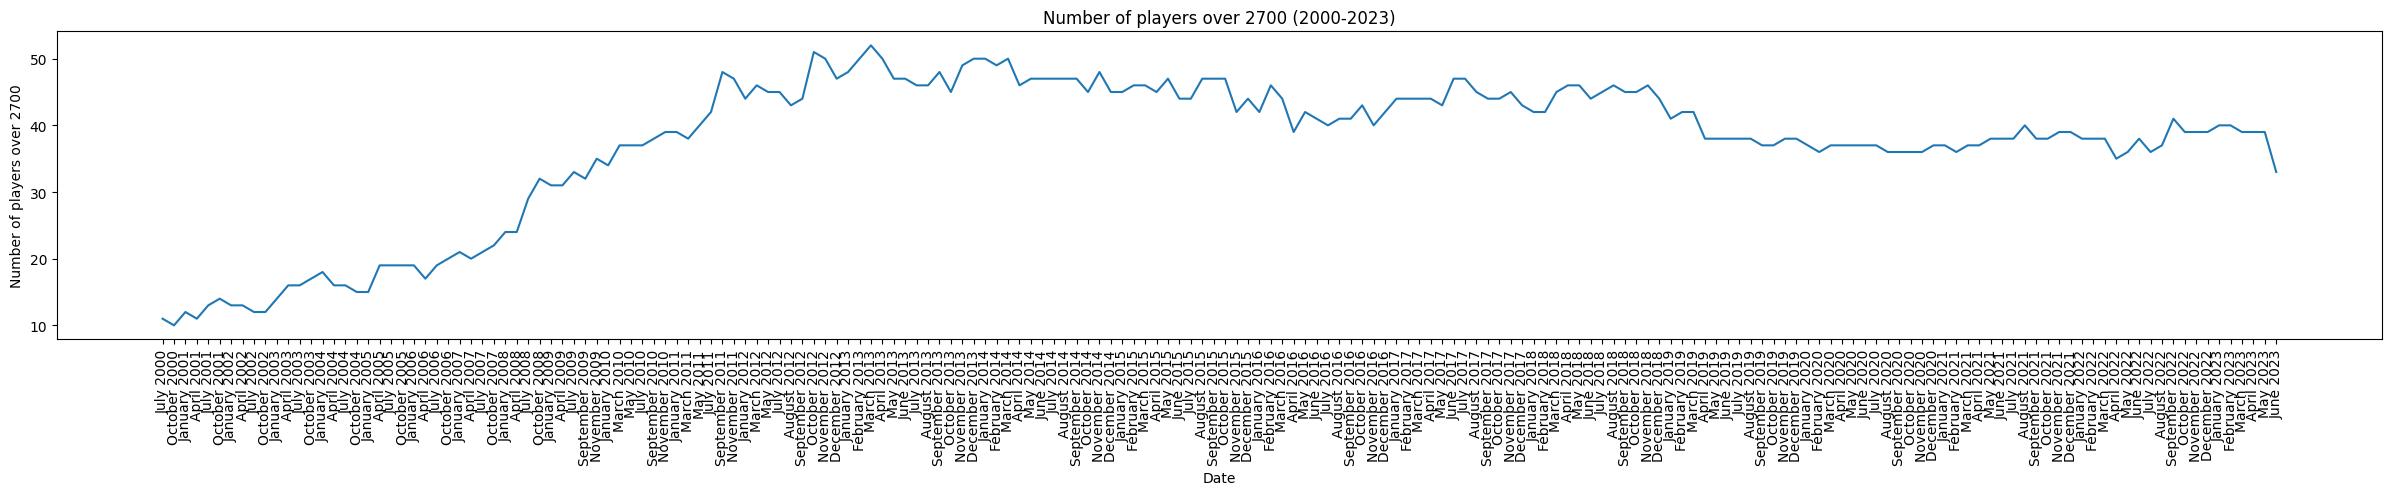

In [90]:
over2700 = (df_rating > 2699).sum()
plt.plot(all_date, over2700.values)
plt.xlabel('Date')
plt.ylabel('Number of players over 2700')
plt.title('Number of players over 2700 (2000-2023)')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.rcParams["figure.figsize"] = (30,4)
plt.show()

Same patterns could be seen when we examine the number of players over 2650 in the top100. There was quite a long period (roughly 8 years with a little interruption), when there was 100 or more players in the world with 2650 rating, now (in June 2023) a rating around 2645 is enough to get into the top100.

Here it is also visible, that FIDE ratings have inflated way more between 2000 and let's say 2011, compared to the period beginning from 2011. Starting from somewhere around 2018-19, even some deflation is visible.

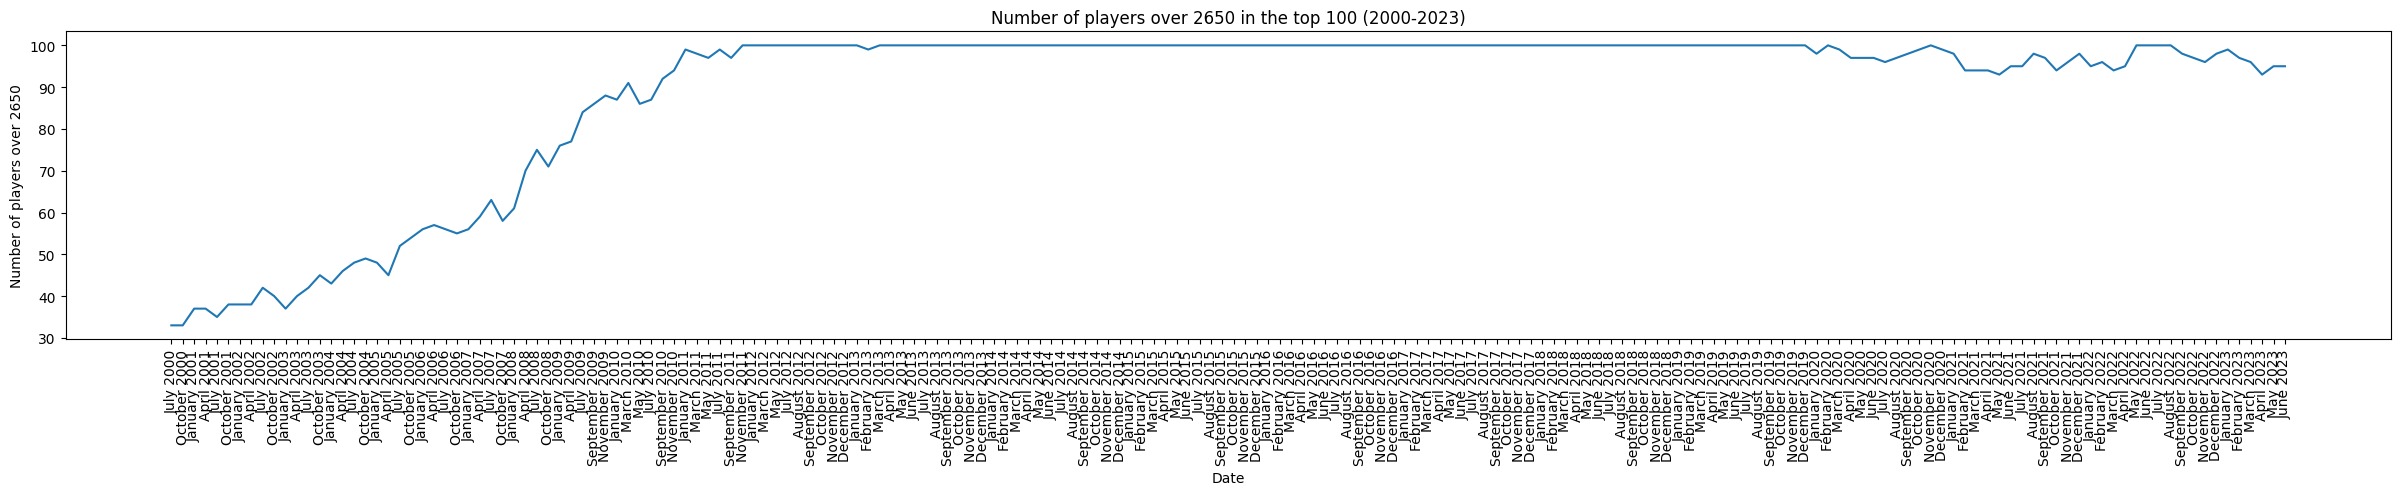

In [91]:
over2650 = (df_rating > 2649).sum()
over2650
plt.plot(all_date, over2650.values)
plt.xlabel('Date')
plt.ylabel('Number of players over 2650')
plt.title('Number of players over 2650 in the top 100 (2000-2023)')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.rcParams["figure.figsize"] = (30,4)
plt.show()

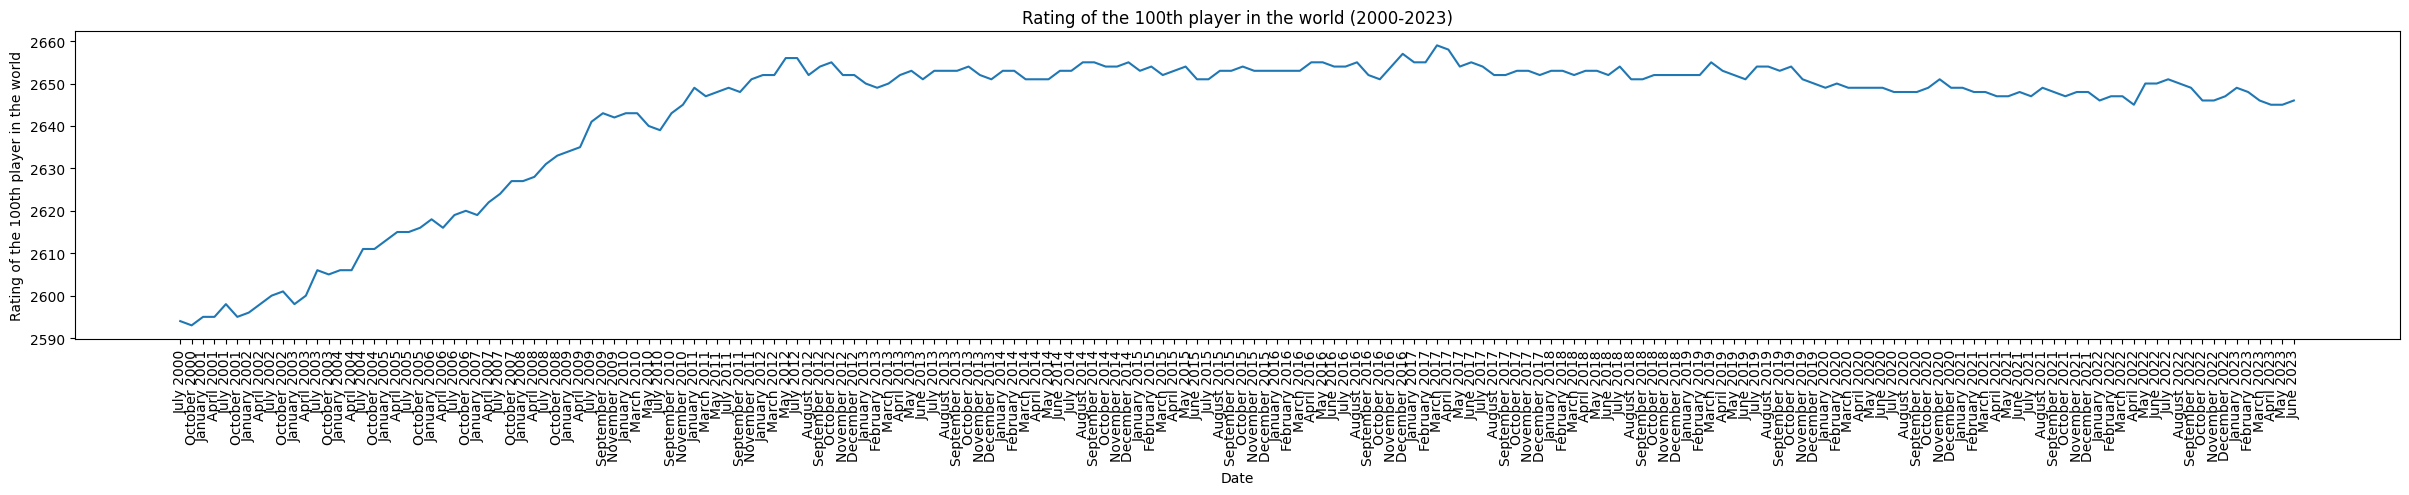

In [92]:
row_100 = df_rating.iloc[99]

plt.plot(all_date, row_100)
plt.xlabel('Date')
plt.ylabel('Rating of the 100th player in the world')
plt.title('Rating of the 100th player in the world (2000-2023)')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.rcParams["figure.figsize"] = (30,4)
plt.show()

The rating of the highest rated player in the world.
There is a visible drop at the beginning of 2007 - at first I thought it was due to Kasparov's retirement and inactivity, but (if you look at the second chart made with Altair) it wasn't, since he retired in 2005, and after one year without having played any games, FIDE has removed him from the world rankings. It was simply that the then-leader Bulgarian Veselin Topalov lost a lot of points, but still remained #1.

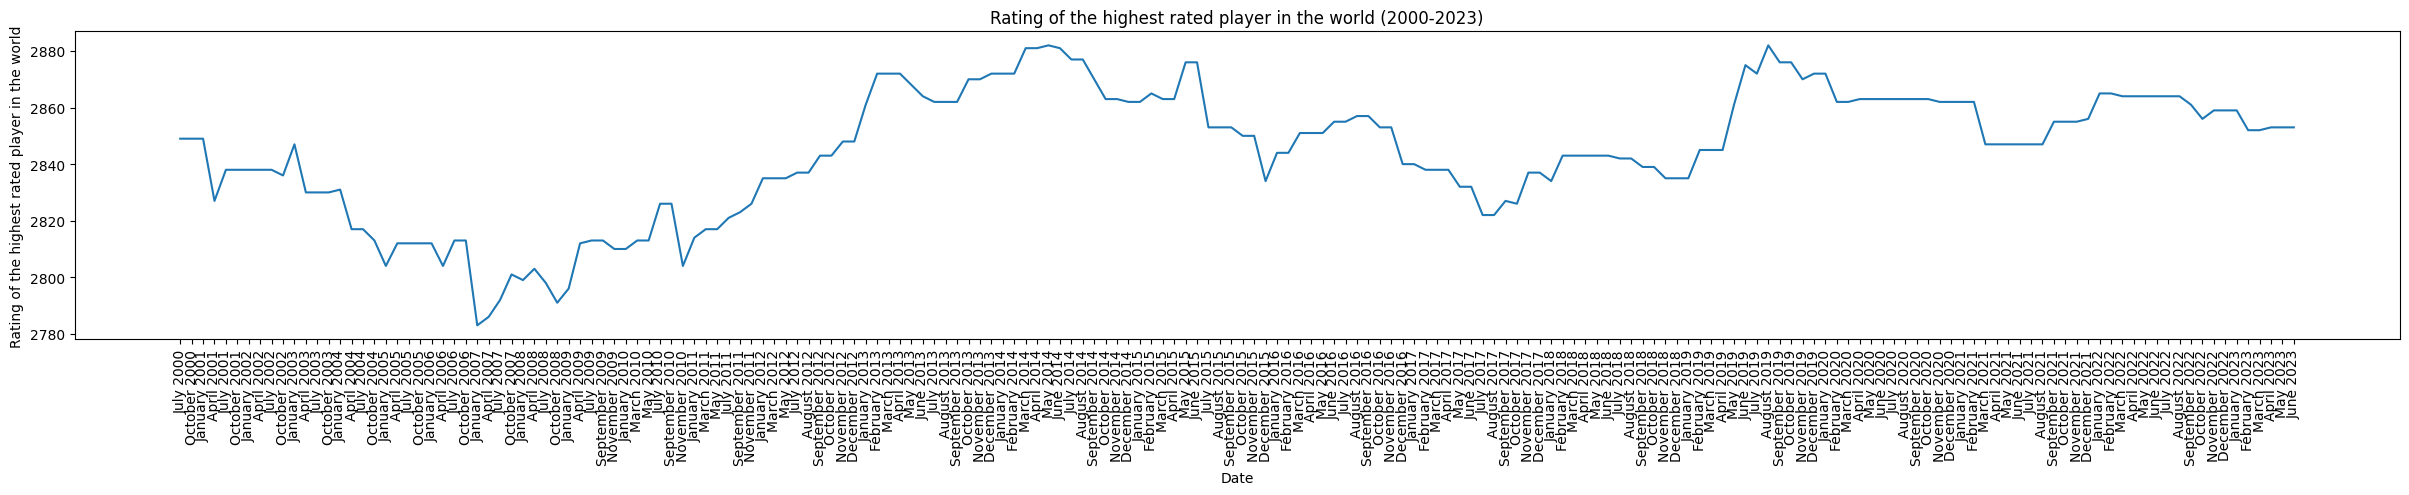

In [93]:
row_1 = df_rating.iloc[0]

plt.plot(all_date, row_1)
plt.xlabel('Date')
plt.ylabel('Rating of the highest rated player in the world')
plt.title('Rating of the highest rated player in the world (2000-2023)')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.rcParams["figure.figsize"] = (30,4)
plt.show()

In [94]:
df_row_1 = pd.Series.tolist(row_1)
row_1_name = df_name.iloc[: , :186].iloc[0]
df_row_1_name = pd.Series.tolist(row_1_name)

df2 = pd.DataFrame()
df2['Date'] = all_date
df2['Rating'] = df_row_1
df2['Name'] = df_row_1_name
df2['Date'] = df2['Date'].astype('category')

In [95]:
df2

,Date,Rating,Name
0,July 2000,2849.0,"Kasparov, Garry"
1,October 2000,2849.0,"Kasparov, Garry"
2,January 2001,2849.0,"Kasparov, Garry"
3,April 2001,2827.0,"Kasparov, Garry"
4,July 2001,2838.0,"Kasparov, Garry"
...,...,...,...
181,February 2023,2852.0,"Carlsen, Magnus"
182,March 2023,2852.0,"Carlsen, Magnus"
183,April 2023,2853.0,"Carlsen, Magnus"
184,May 2023,2853.0,"Carlsen, Magnus"


In this diagram, it is also visible who was the #1 chess player according to ratings on a given FIDE list, and thanks to the tooltips, it is easy to see not only who was the leader on a given list, but his exact rating as well.
Since 2000 July, there were only five players who were #1 on the list, and one of them (Vladimir Kramnik) was only once number one, in January 2008.

In [96]:
df2['Date'] = pd.Categorical(df2['Date'], categories=df2['Date'].unique(), ordered=True)


chart = alt.Chart(df2).mark_line().encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Rating', scale=alt.Scale(domain=(2760, 2900))),
).properties(
    title='The rating of the #1 chess player (July 2000 - June 2023)',
    width=1350
)

points = alt.Chart(df2).mark_point(filled=True, size=50).encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Rating',scale=alt.Scale(domain=(2760, 2900))),
    color='Name',
    tooltip=[alt.Tooltip('Date', title='Date'),
             alt.Tooltip('Name', title='Name'),
             alt.Tooltip('Rating', title='Rating')]
)


# Display the chart
chart + points

alt.LayerChart(...)

In [70]:
averages = df.iloc[:, :186].mean()
averages

0      2643.55
1      2643.58
2      2646.67
3      2646.09
4      2645.04
        ...   
181    2696.91
182    2696.01
183    2694.67
184    2694.99
185    2696.08
Length: 186, dtype: float64

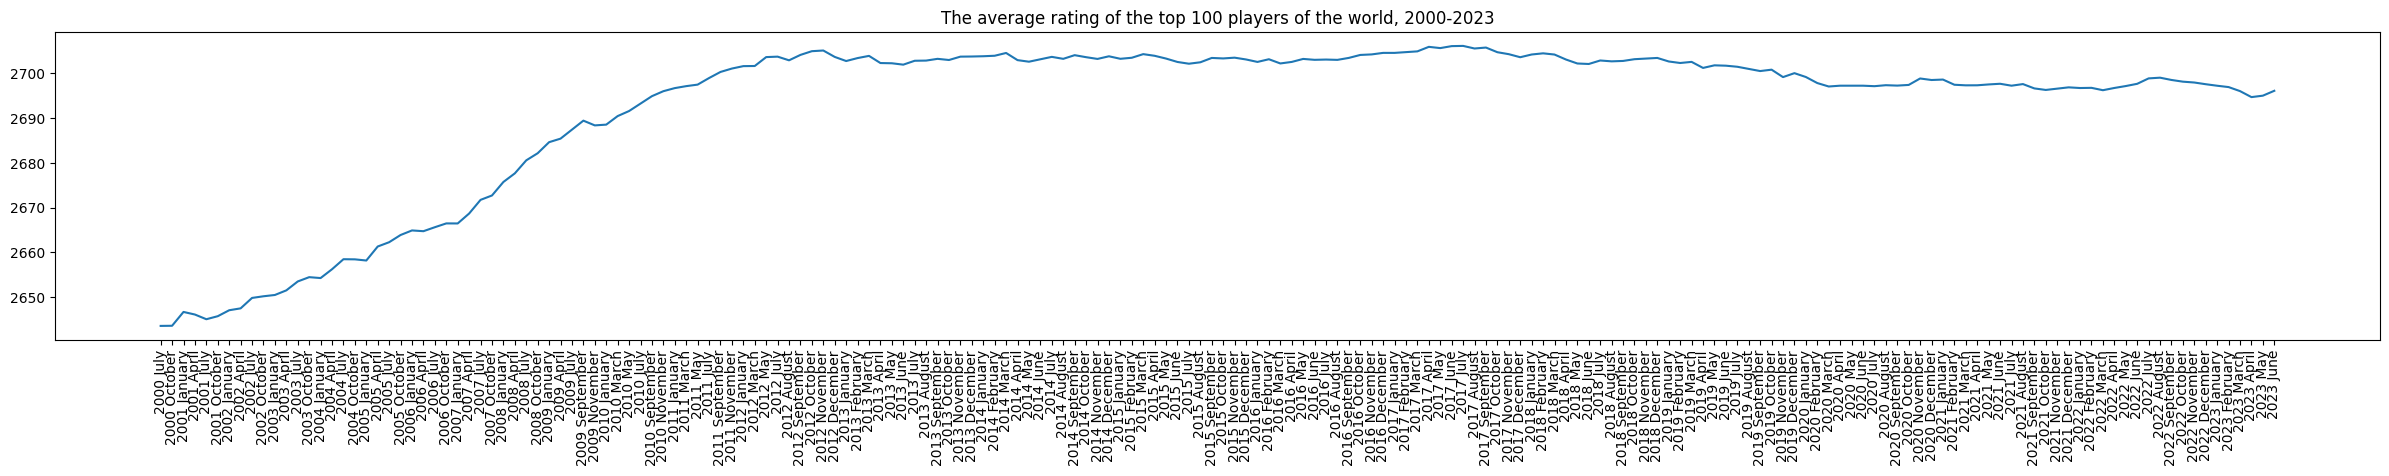

In [71]:
plt.plot(all_date, averages)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('The average rating of the top 100 players of the world, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)

In [72]:
averages_df = averages.reset_index()
averages_df.columns = ['Column', 'Average']

averages_df['Date'] = df2['Date']
averages_df.drop(['Column'],axis=1)

chart = alt.Chart(averages_df).mark_line().encode(
    x=alt.X('Date'),
    y=alt.Y('Average', scale=alt.Scale(domain=(2640, 2710)))
).properties(
    title='Average rating of the first 100 players'
)

points = alt.Chart(averages_df).mark_point(filled=True, size=50).encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Average',scale=alt.Scale(domain=(2640, 2710))),
    tooltip=[alt.Tooltip('Date', title='Date'),
             alt.Tooltip('Average', title='Average')]
)

# Show the chart
chart + points

alt.LayerChart(...)

In [73]:
averages_top10 = df.iloc[:10, :186].mean()
averages_top10

0      2750.9
1      2750.2
2      2751.2
3      2752.8
4      2752.5
        ...  
181    2779.9
182    2778.4
183    2778.9
184    2778.9
185    2778.9
Length: 186, dtype: float64

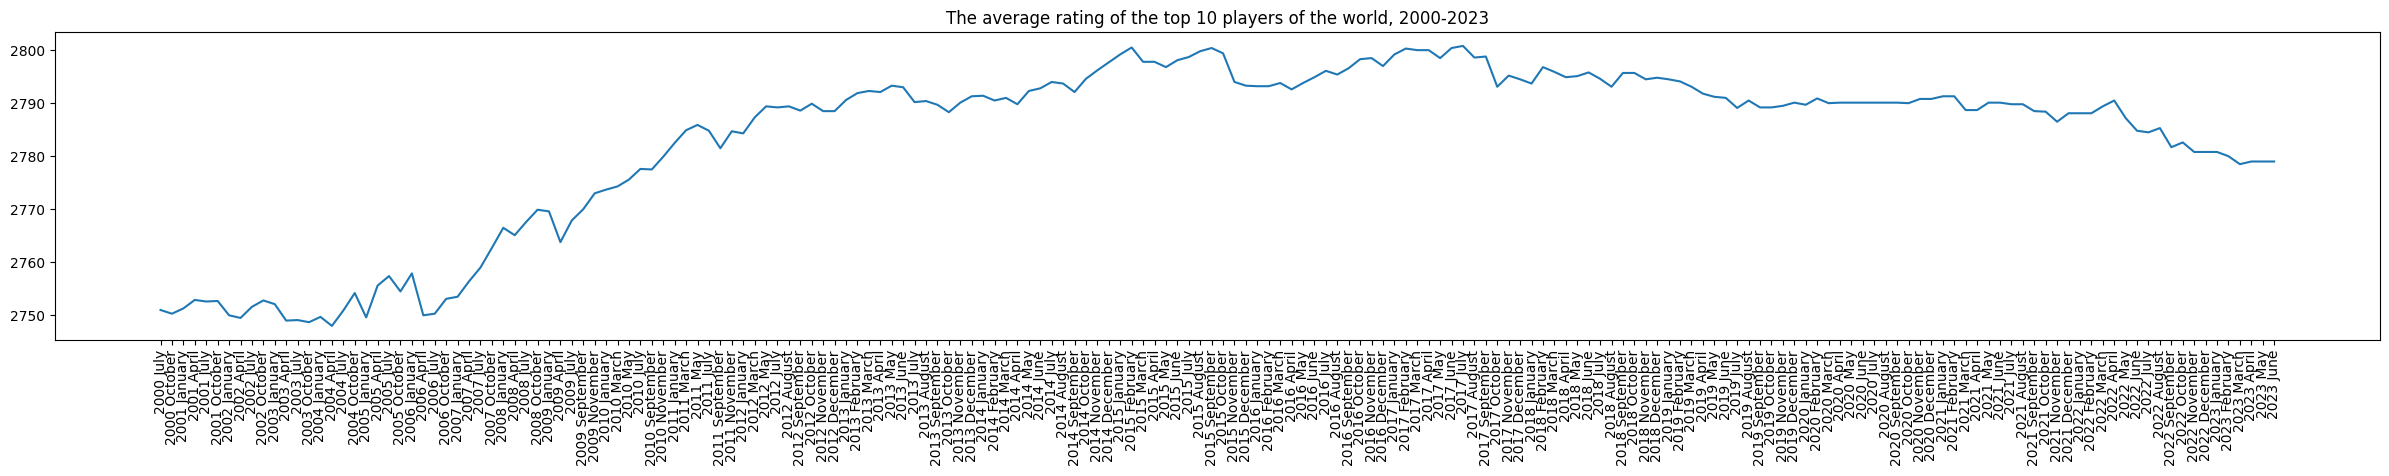

In [74]:
plt.plot(all_date, averages_top10)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('The average rating of the top 10 players of the world, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)

In [75]:
averages_top10_df = averages_top10.reset_index()
averages_top10_df.columns = ['Column', 'Average']

averages_top10_df['Date'] = df2['Date']
averages_top10_df.drop(['Column'],axis=1)

chart = alt.Chart(averages_top10_df).mark_line().encode(
    x=alt.X('Date'),
    y=alt.Y('Average', scale=alt.Scale(domain=(2730, 2790)))
).properties(
    title='Average rating of the first 10 players'
)

points = alt.Chart(averages_top10_df).mark_point(filled=True, size=50).encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Average',scale=alt.Scale(domain=(2740, 2810))),
    tooltip=[alt.Tooltip('Date', title='Date'),
             alt.Tooltip('Average', title='Average')]
)

# Show the chart
chart + points

alt.LayerChart(...)

The number of players playing under Russian flag in the top 100.
Yes, there is a reason for using "playing under Russian flag" and not "Russian" - many Russian players have started to play under the flag of FIDE after Russia starting its war against Ukraine in February 2022, some of them even changed federations.

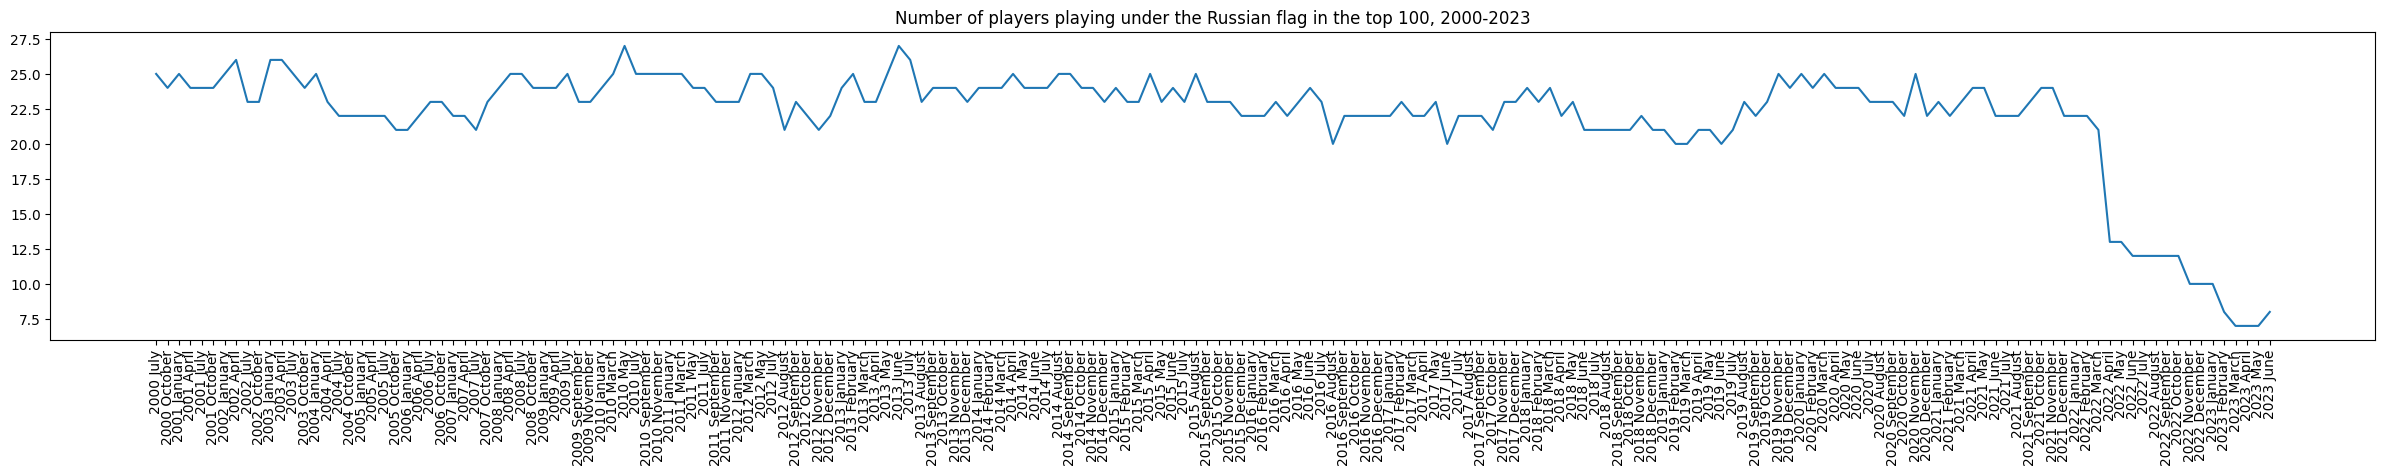

In [76]:
rus_counts = df_country.eq('RUS').sum()
rus_counts

plt.plot(all_date, rus_counts)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('Number of players playing under the Russian flag in the top 100, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)

A comparison of India, a country which produces nowadays a lot of young chess talents, and Hungary, a country which has a rich chess history, but somehow, there aren't too many new faces between the leading players of the country. It is visible, how India overtook Hungary in the last few years.

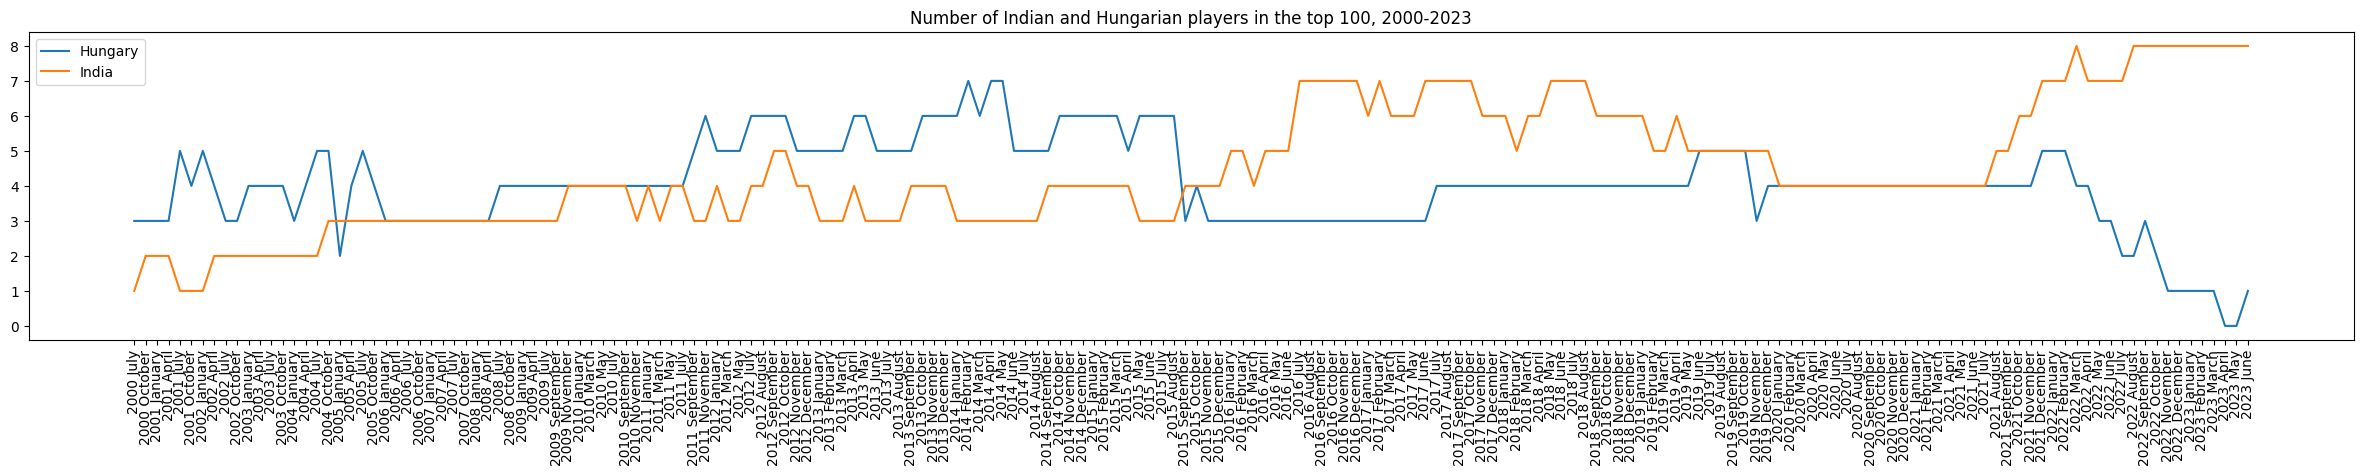

In [77]:
hun_counts = df_country.eq('HUN').sum()
hun_counts

plt.plot(all_date, hun_counts, label='Hungary')

ind_counts = df_country.eq('IND').sum()
ind_counts

plt.plot(all_date, ind_counts, label='India')
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.legend(loc="upper left")
plt.title('Number of Indian and Hungarian players in the top 100, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)


In [78]:
averages = df.iloc[:, :186].mean()
averages

0      2643.55
1      2643.58
2      2646.67
3      2646.09
4      2645.04
        ...   
181    2696.91
182    2696.01
183    2694.67
184    2694.99
185    2696.08
Length: 186, dtype: float64

In [79]:
averages_df = averages.reset_index()
averages_df.columns = ['Column', 'Average']

averages_df['Date'] = df2['Date']
averages_df.drop(['Column'],axis=1)

chart = alt.Chart(averages_df).mark_line().encode(
    x=alt.X('Date'),
    y=alt.Y('Average', scale=alt.Scale(domain=(2640, 2710)))
).properties(
    title='Average rating of the first 100 players'
)

points = alt.Chart(averages_df).mark_point(filled=True, size=50).encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Average',scale=alt.Scale(domain=(2640, 2710))),
    tooltip=[alt.Tooltip('Date', title='Date'),
             alt.Tooltip('Average', title='Average')]
)

# Show the chart
chart + points

alt.LayerChart(...)

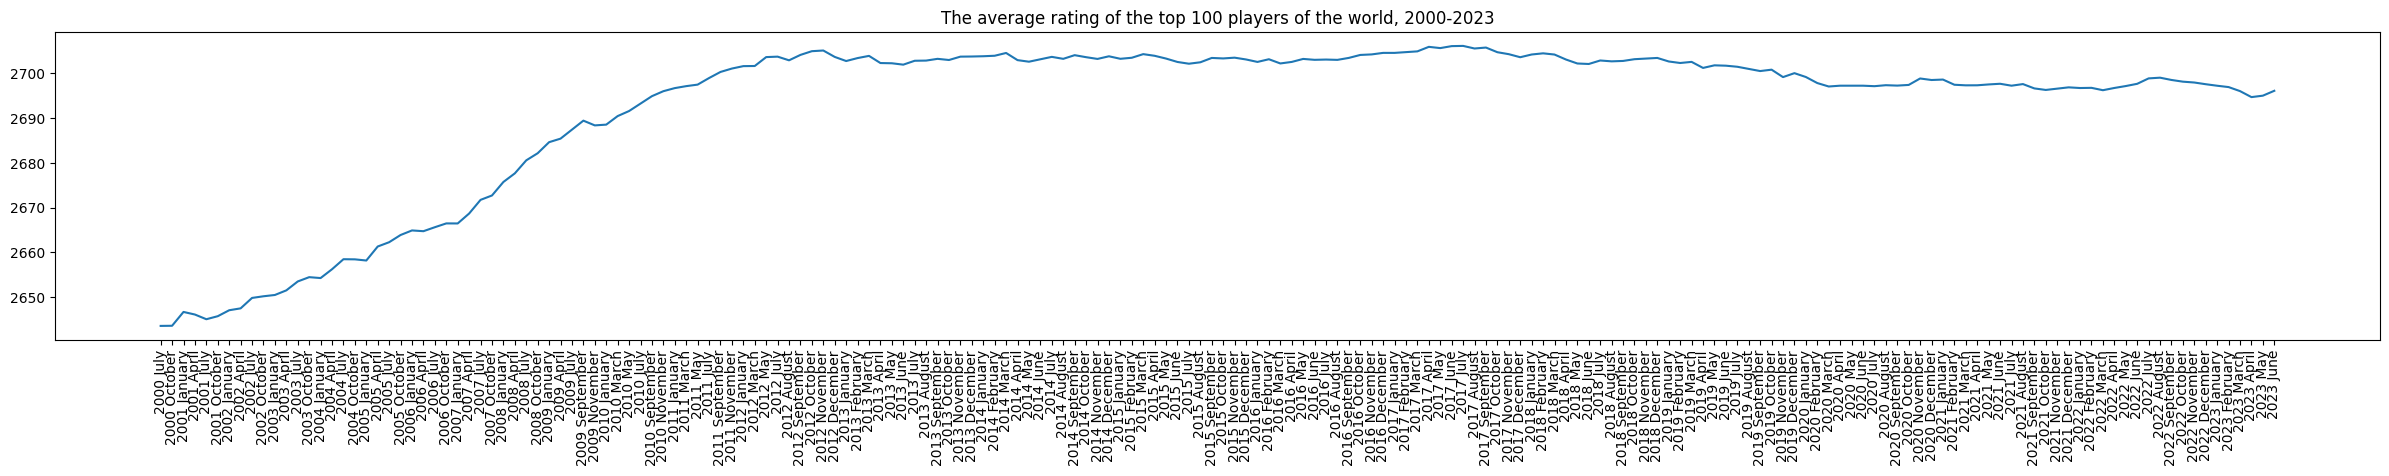

In [35]:
plt.plot(all_date, averages)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('The average rating of the top 100 players of the world, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)

In [26]:
averages_top10 = df.iloc[:10, :186].mean()
averages_top10

0      2750.9
1      2750.2
2      2751.2
3      2752.8
4      2752.5
        ...  
181    2779.9
182    2778.4
183    2778.9
184    2778.9
185    2778.9
Length: 186, dtype: float64

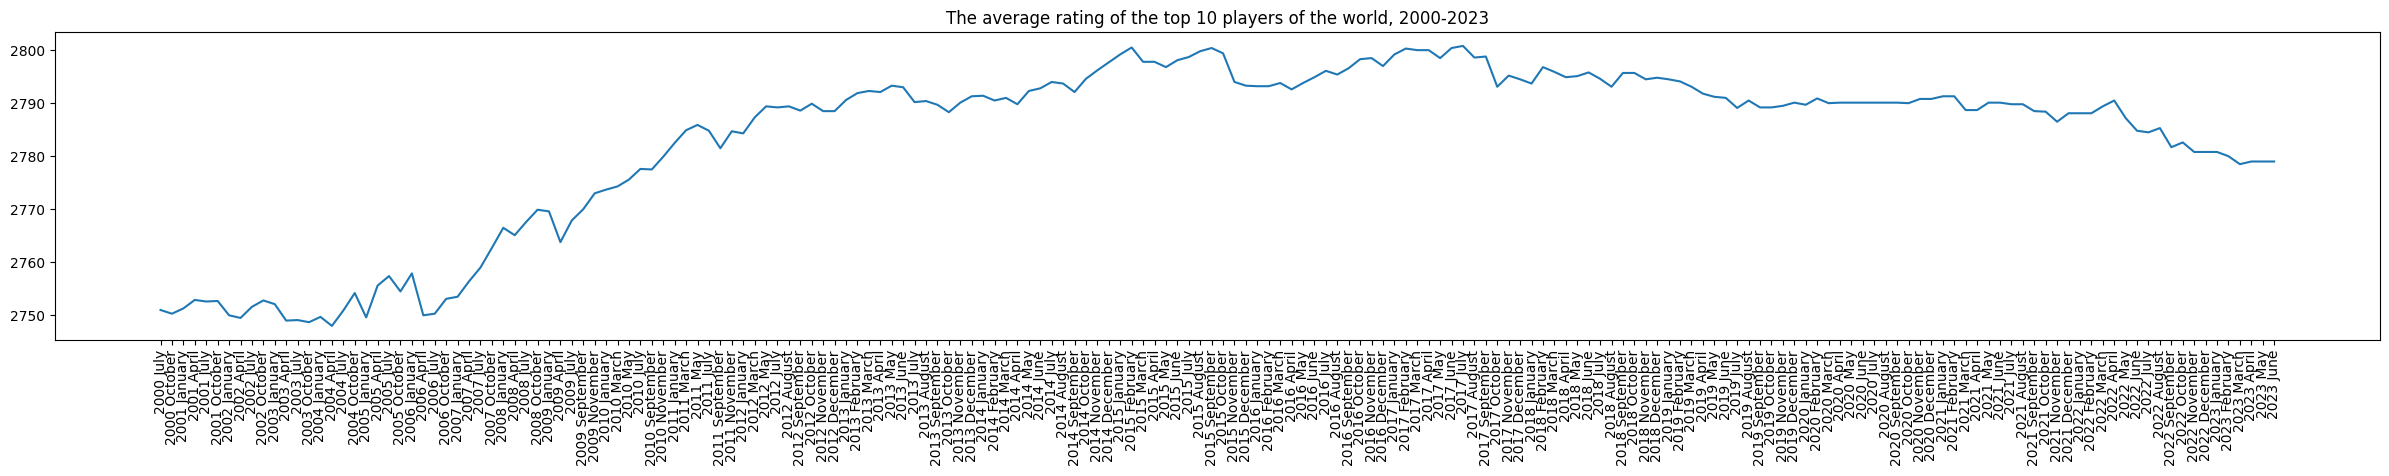

In [36]:
plt.plot(all_date, averages_top10)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('The average rating of the top 10 players of the world, 2000-2023')
plt.rcParams["figure.figsize"] = (30,4)

In [27]:
averages_top10_df = averages_top10.reset_index()
averages_top10_df.columns = ['Column', 'Average']

averages_top10_df['Date'] = df2['Date']
averages_top10_df.drop(['Column'],axis=1)

chart = alt.Chart(averages_top10_df).mark_line().encode(
    x=alt.X('Date'),
    y=alt.Y('Average', scale=alt.Scale(domain=(2730, 2790)))
).properties(
    title='Average rating of the first 10 players'
)

points = alt.Chart(averages_top10_df).mark_point(filled=True, size=50).encode(
    x=alt.X('Date', sort=None),
    y=alt.Y('Average',scale=alt.Scale(domain=(2740, 2810))),
    tooltip=[alt.Tooltip('Date', title='Date'),
             alt.Tooltip('Average', title='Average')]
)

# Show the chart
chart + points

alt.LayerChart(...)